In [21]:
import data_prepro
import data_als
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
train,test = data_prepro.loadData('datasets/data_tr_city.csv','datasets/data_ts_city.csv',trainYearRange1=2017,trainYearRange2=2020)

In [23]:
train

,datetime,구미 혁신도시배수지 유출유량 적산차,year,month
0,2017-01-01 01:00:00,138.0,2017,1
1,2017-01-01 02:00:00,237.0,2017,1
2,2017-01-01 03:00:00,128.0,2017,1
3,2017-01-01 04:00:00,14.0,2017,1
4,2017-01-01 05:00:00,11.0,2017,1
...,...,...,...,...
35058,2020-12-31 19:00:00,328.0,2020,12
35059,2020-12-31 20:00:00,347.0,2020,12
35060,2020-12-31 21:00:00,335.0,2020,12
35061,2020-12-31 22:00:00,141.0,2020,12


In [24]:
y2017 = train[train['year'] == 2017]['구미 혁신도시배수지 유출유량 적산차'].to_numpy()
y2018 = train[train['year'] == 2018]['구미 혁신도시배수지 유출유량 적산차'].to_numpy()
y2019 = train[train['year'] == 2019]['구미 혁신도시배수지 유출유량 적산차'].to_numpy()
y2020 = train[train['year'] == 2020]['구미 혁신도시배수지 유출유량 적산차'].to_numpy()

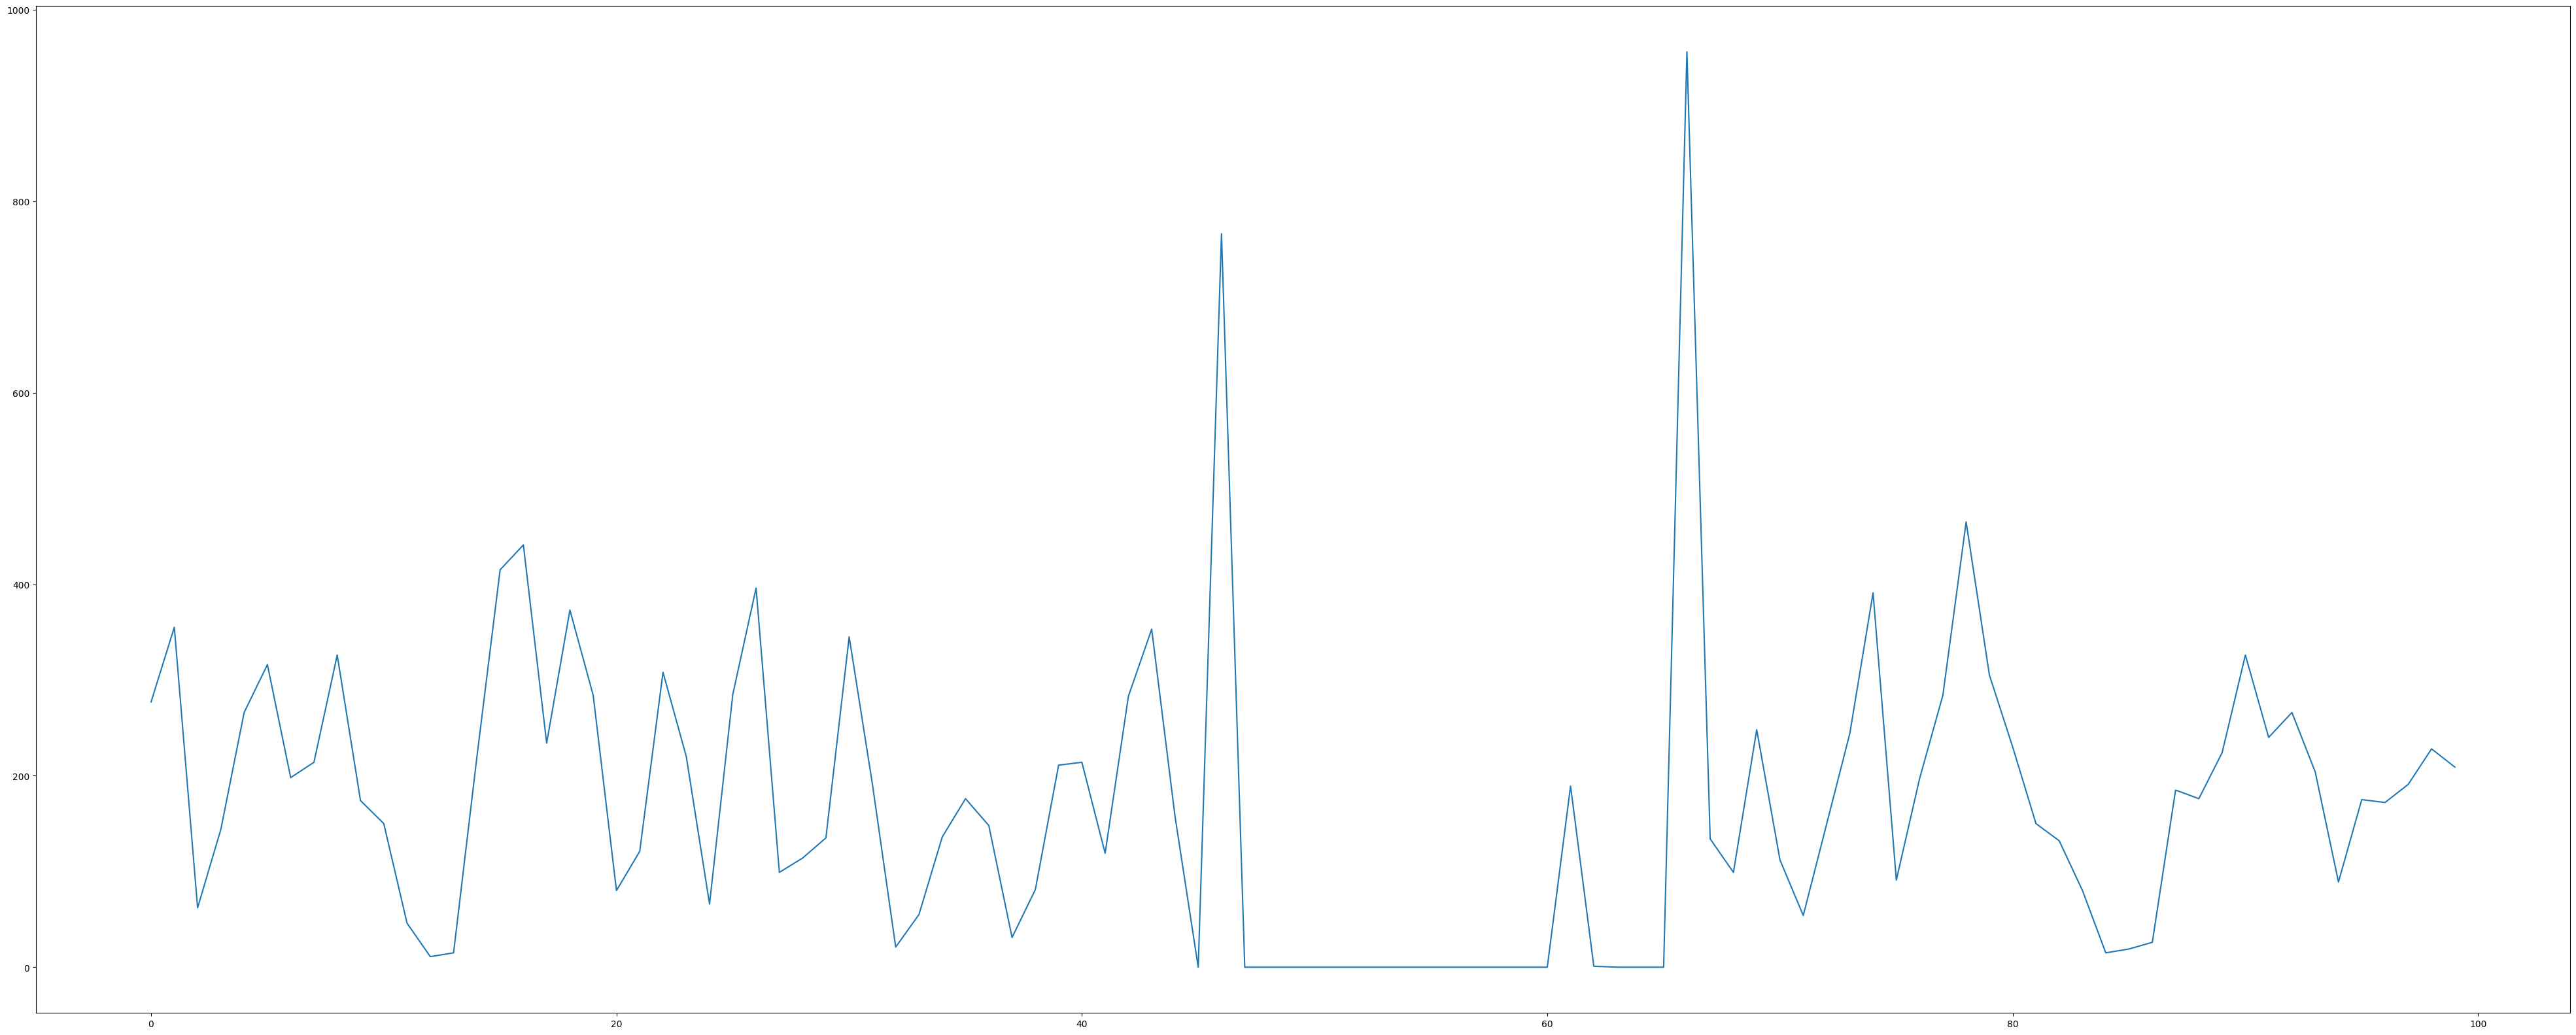

In [25]:
plt.figure(figsize=(50,20))
plt.plot(list(range(len(y2017[2800:2900]))),y2017[2800:2900])

In [26]:
preprotrain = data_prepro.outlierDataToNan(train,low=True,high=True,thres=10.0)

In [27]:
# preprotrain = data_prepro.fillnaBehind(preprotrain)

In [28]:
preprotrain = data_prepro.fillZero(preprotrain)

[2080, 2127, 2845, 2847, 2848, 2849, 2850, 2851, 2852, 2853, 2854, 2855, 2856, 2857, 2858, 2859, 2860, 2863, 2864, 2865, 3423, 3425, 3430, 3452, 3455, 3457, 3459, 3461, 3463, 3466, 3467, 3469, 3471, 3473, 3474, 3476, 3480, 3481, 3482, 3483, 3484, 3487, 3488, 3489, 3490, 3492, 3493, 3494, 3495, 3496, 3497, 3498, 3499, 3500, 3501, 3502, 3503, 3504, 3505, 3506, 3507, 3508, 3509, 3510, 3511, 3512, 3514, 3515, 3516, 3517, 3518, 3519, 3520, 3521, 3522, 3523, 3524, 3525, 3526, 3527, 3528, 3529, 3530, 3531, 3532, 3534, 3535, 3536, 3537, 3538, 3539, 3540, 3541, 3544, 3545, 3547, 3548, 3549, 3550, 3551, 3552, 3553, 3555, 3556, 3557, 3558, 3559, 3560, 3589, 3590, 3591, 3592, 3594, 3595, 3596, 3597, 3598, 3599, 3600, 3601, 3602, 3603, 3604, 3605, 3606, 9206, 10048, 10205, 10206, 10207, 11994, 12507, 12508, 12509, 12510, 12511, 12515, 12516, 12517, 12518, 17558, 21595, 25626]
2080
2127
2845
2847
2848
2849
2850
2851
2852
2853
2854
2855
2856
2857
2858
2859
2860
2863
2864
2865
3423
3425
3430
3452
3455

In [29]:
preprotrain = data_prepro.fillprevValue(preprotrain)

In [30]:
prey2017 = preprotrain[preprotrain['year'] == 2017]['구미 혁신도시배수지 유출유량 적산차'].to_numpy()
prey2018 = preprotrain[preprotrain['year'] == 2018]['구미 혁신도시배수지 유출유량 적산차'].to_numpy()
prey2019 = preprotrain[preprotrain['year'] == 2019]['구미 혁신도시배수지 유출유량 적산차'].to_numpy()
prey2020 = preprotrain[preprotrain['year'] == 2020]['구미 혁신도시배수지 유출유량 적산차'].to_numpy()

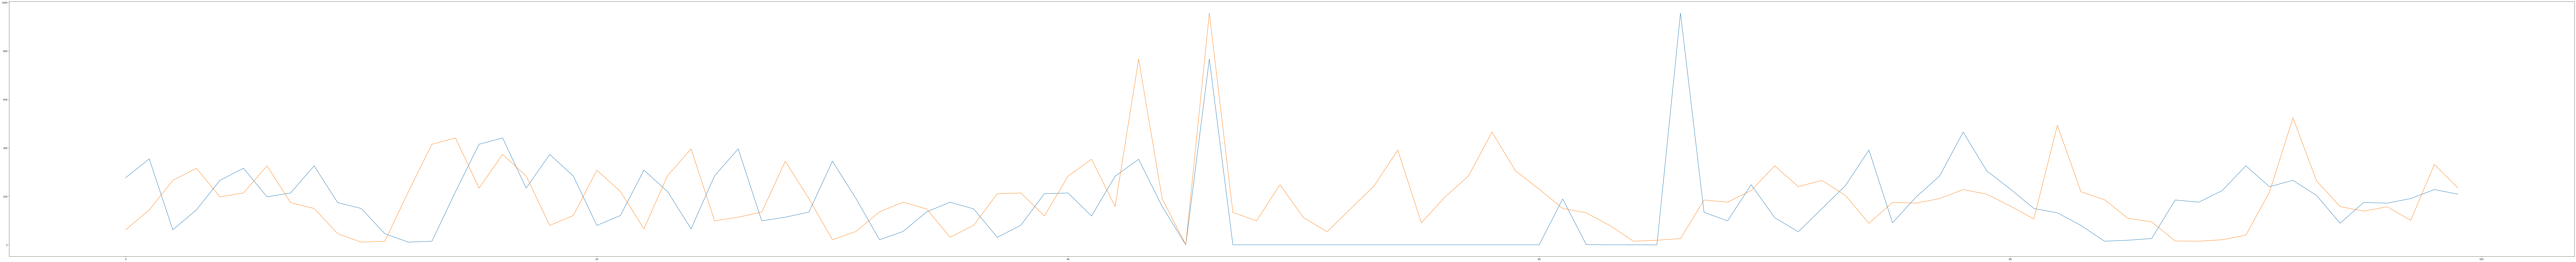

In [31]:
plt.figure(figsize=(200,20))
plt.plot(list(range(len(y2017[2800:2900]))),y2017[2800:2900])
plt.plot(list(range(len(prey2017[2800:2900]))),prey2017[2800:2900])
# plt.plot(list(range(len(y2018))),y2018)
# plt.plot(list(range(len(y2019))),y2019)
# plt.plot(list(range(len(y2020))),y2020)

In [32]:
df = pd.concat([preprotrain,test])

In [33]:
years,monthHistory = data_als.dataMean(df,2017,2021)

2017 년
2017년 평균 210.35096946246526
1월 : 174.48183041722746
2월 : 183.9047619047619
3월 : 191.54365835579515
4월 : 196.8791650997151
5월 : 232.45839874411303
6월 : 249.5263888888889
7월 : 232.46639784946237
8월 : 224.65860215053763
9월 : 214.69722222222222
10월 : 203.9247311827957
11월 : 212.94722222222222
12월 : 207.97177419354838

2018 년
2018년 평균 235.89601683440074
1월 : 209.1978465679677
2월 : 211.89583666169895
3월 : 217.53711201079622
4월 : 222.56666666666666
5월 : 225.70456805929922
6월 : 248.29113924050634
7월 : 278.26210336021506
8월 : 289.48924731182797
9월 : 230.8736111111111
10월 : 229.67741935483872
11월 : 235.04843111111114
12월 : 229.6465053763441

2019 년
2019년 평균 248.20390381409155
1월 : 229.349932705249
2월 : 228.05295491071428
3월 : 237.95430107526883
4월 : 243.63472222222222
5월 : 253.51478494623655
6월 : 256.230876216968
7월 : 266.5255376344086
8월 : 265.4986559139785
9월 : 248.22916666666666
10월 : 245.38844086021504
11월 : 248.80833333333334
12월 : 253.43337819650068

2020 년
2020년 평균 254.589758492714

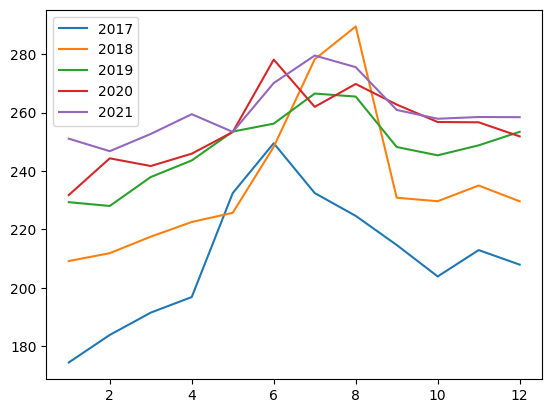

In [34]:
data_als.showMonthHistoryGrap(range(2017,2022),monthHistory)